**plot a normal distribution for the Mass of a SM Higgs Boson (mH=125 GeV)**

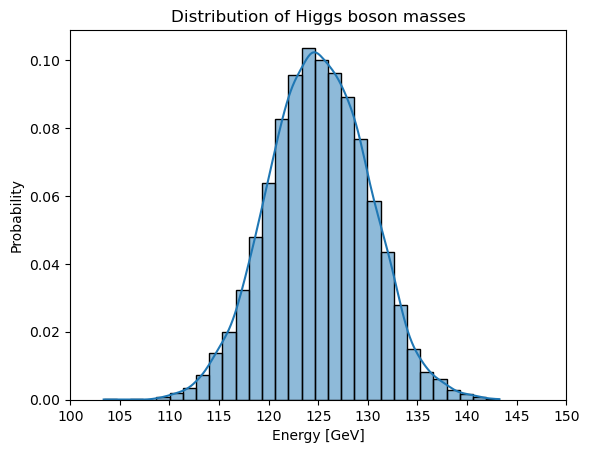

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mu, sigma = 125, 5
data = np.random.normal(mu, sigma, 10000)

sns.histplot(data, bins=30, kde=True, stat='probability')
plt.xlabel('Energy [GeV]')
plt.ylabel('Probability')
plt.title("Distribution of Higgs boson masses")
plt.xticks(range(100,155,5))
plt.show()

**Lets standardise our distribution:**

Percentage of data within one standard deviation: 68.15
Percentage of data within two standard deviation: 95.74
Percentage of data within three standard deviation: 99.77


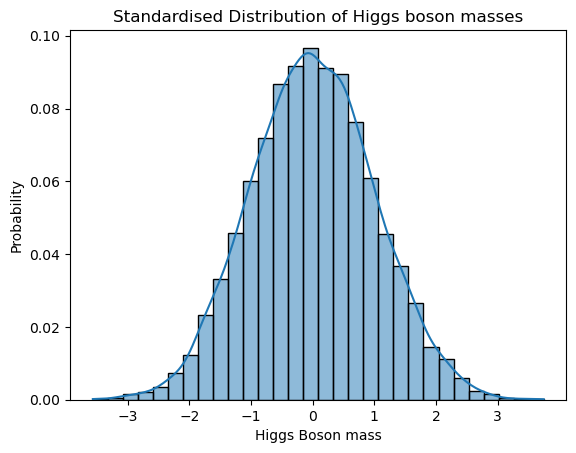

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Generating normally distributed data for Higgs mass
mu, sigma = 125, 5
data = np.random.normal(mu, sigma, 10000)

#Finding the z-score for every value in the data
data = (data - mu)/sigma

#Proving the empirical rule
one_sd = len(data[(data>-1) & (data<1)])/len(data)*100
two_sd = len(data[(data>-2) & (data<2)])/len(data)*100
three_sd = len(data[(data>-3) & (data<3)])/len(data)*100

print('Percentage of data within one standard deviation:', round(one_sd,2))
print('Percentage of data within two standard deviation:', round(two_sd,2))
print('Percentage of data within three standard deviation:', round(three_sd,2))

#Plotting the z-scores
sns.histplot(data, bins=30, kde=True, stat='probability')
plt.xlabel('Higgs Boson mass')
plt.ylabel('Probability')
plt.xticks(range(-3,4,1))
plt.title("Standardised Distribution of Higgs boson masses")
plt.show()

**What percentage of Higgs boson candidates have a mass less than 133 GeV?**

Step1: Find z-score, which is the answer to ‘133 is how many standard deviations away from the mean?’

Step 2: Use Z-table to find the probability or Use norm.cdf() from scipy.stats in python to find the % area under the curve up until the calculated z-score.

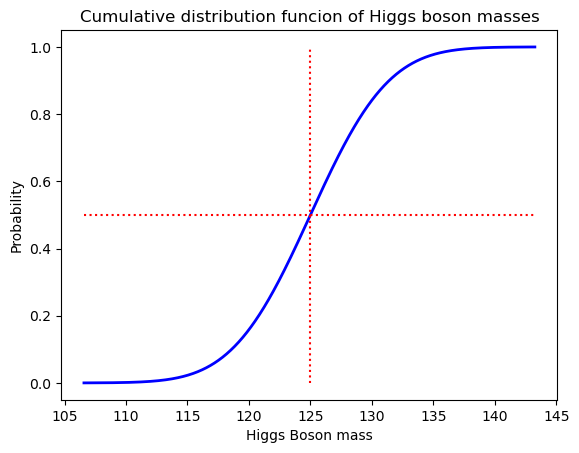

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

#Generating normally distributed data for Higgs mass
mu, sigma = 125, 5
data = np.random.normal(mu, sigma, 10000)

#data = (data - mu)/sigma
# Create a range of values
x = np.linspace(min(data), max(data), 1000)

# Calculate the CDF
#cdf = norm.cdf(x, mu, sigma)

p= norm.cdf(x, mu, sigma)

#Plotting the CDF
plt.plot(x, p, color='blue', linewidth=2, markersize=2)
plt.hlines(0.5, min(data), max(data),linestyle='dotted', color='red')
plt.vlines(125, 0, 1,linestyle='dotted', color='red')
plt.xlabel('Higgs Boson mass')
plt.ylabel('Probability')
plt.title("Cumulative distribution funcion of Higgs boson masses")
plt.show()

In [7]:
from scipy.stats import norm

mu = 125
sigma = 5

#Find the z-score
z = (133-mu)/sigma


#Find the probability (area under the curve untin 133 GeV)
p = norm.cdf(z)

print('Percentage of the Higgs boson candidates that have a mass less than 133 GeV:', round(p*100,2))


Percentage of the Higgs boson candidates that have a mass less than 133 GeV: 94.52


**What percentage of Higgs boson candidates have a mass higher than 133 GeV?**

Step1: Find z-score, which is the answer to ‘133 is how many standard deviations away from the mean?’

Step 2: Use Z-table to find the probability or Use norm.cdf() from scipy.stats in python to find the % area under the curve up until the calculated z-score.

Step 3: Subtract it from 1 to get the inverse probability.



In [8]:
#Find the z-score
z = (133-mu)/sigma

#Find the probability (1 - area under the curve until 133 GeV)
p = 1 - norm.cdf(z)

#Finding the z-score for every value in the data
data = (data - mu)/sigma

print('Percentage of the Higgs boson candidates that have a mass higher than 133 GeV:', round(p*100,2))

Percentage of the Higgs boson candidates that have a mass higher than 133 GeV: 5.48


**What percentage of Higgs boson candidates have 120 < mH <135 GeV?**
Step1: Find z-score for 120 and 130 GeV

Step 2: Use norm.cdf() from scipy.stats in python to find the % area under the curve up until the calculated z-score.

Step 3: Subtract the two cumulative probability

In [9]:
#Find the z-score
z1 = (120-mu)/sigma
z2 = (130-mu)/sigma

#Find the probability (area under the curve)
p1 = norm.cdf(z1)
p2 = norm.cdf(z2)
diff = p2-p1

print('Percentage of the Higgs boson candidates that have  mH<120 GeV:', round(p1*100,2))
print('Percentage of the Higgs boson candidates that have  mH<130 GeV:', round(p2*100,2))
print('Percentage of the Higgs boson candidates that have  120<mH<125 GeV:', round(diff*100,2))

Percentage of the Higgs boson candidates that have  mH<120 GeV: 15.87
Percentage of the Higgs boson candidates that have  mH<130 GeV: 84.13
Percentage of the Higgs boson candidates that have  120<mH<125 GeV: 68.27


**What is the mass of a Higgs Boson who has a mass higher than 80% of all the candidates?**
Ans: Here, we need to calculate the z-score such that norm.cdf(z) = 0.8
To put it in simpler terms, we need to find the 80th percentile. We can find it using norm.ppf()

In [ ]:
#Find the z-score for 80th percentile
z = norm.ppf(0.8) #percent point function, gives percentile
x = (z*sigma) + mu #find the value using z-score formula

print("The mass for which a Higgs Boson has a mass higher than 80% of all the candidates:", round(x,2))

The mass for which a Higgs Boson has a mass higher than 80% of all the candidates: 129.21


**Tests for Normality**
Many machine learning algorithms are based on the assumption that the data or the prediction errors are normally distributed. But given a set of values, how do you test if they are normally distributed?

One way is to plot the data on a histogram and inspect it for features of normal distribution such as symmetry, bell-shape, skewness etc. Such visual inspection may give a rough idea but there are a few scientific methods as well which are widely used: **QQ Plot:** A Q-Q plot (Quantile-Quantile Plot) compares the quantiles/z-scores of the data against the quantiles of a theoretical normal distribution. A function in python’s statsmodels library called qqplot (https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) can be used to create the plot:

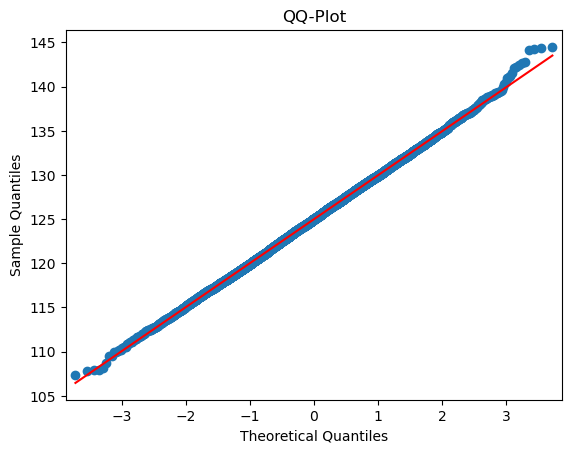

In [11]:
#QQPlot

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

#Generating normally distributed data for higgs mass
mu, sigma = 125, 5
data = np.random.normal(mu, sigma, 10000)

#QQPlot
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data, line='s')
plt.title('QQ-Plot')
plt.show()

If the points on the plot are not significantly diverging from the diagonal (x=y), it shows that the data is normally distributed.

In out case the data were not standardised so on y-axis we have the quantiles for the higgs mass distribution. If we standardise them we have:

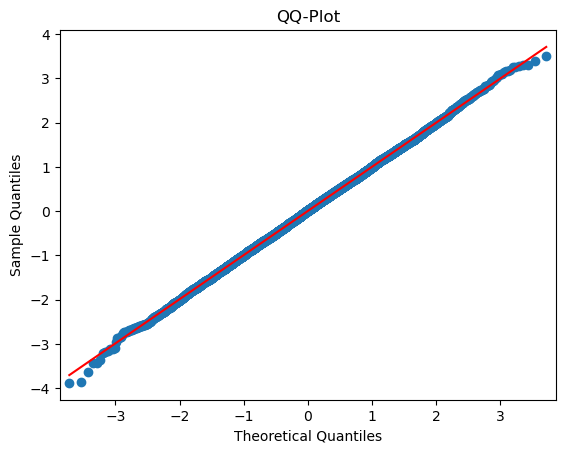

In [12]:
#QQPlot

import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

#Generating normally distributed data for Higgs mass
mu, sigma = 125, 5
data = np.random.normal(mu, sigma, 10000)
data = (data - mu)/sigma

#QQPlot
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(data, line='s')
plt.title('QQ-Plot')
plt.show()

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\User\AppData\Local\Temp\ipykernel_6924\1720888140.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, ps[i],  linewidth=2, markersize=2,  label= f"$\mu = ${mus[i]}  $\sigma=  ${sigmas[i]}")
C:\Users\User\AppData\Local\Temp\ipykernel_6924\1720888140.py:13: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, ps[i],  linewidth=2, markersize=2,  label= f"$\mu = ${mus[i]}  $\sigma=  ${sigmas[i]}")


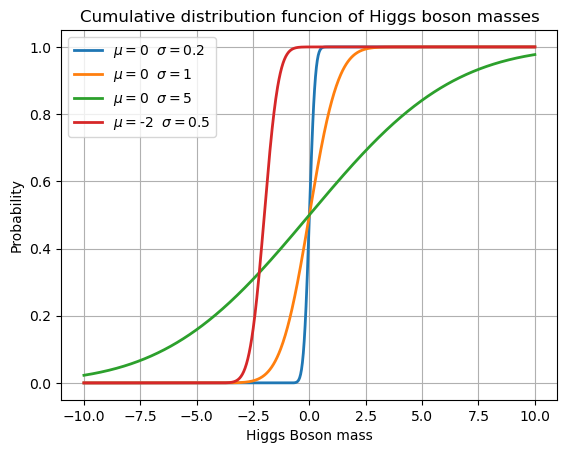

In [13]:
#Generating normally distributed data for Higgs mass
mus, sigmas = [0,0,0,-2], [0.2,1,5,0.5]

x = np.linspace(-10, 10, 1000)

ps= [] 
for i in range(len(sigmas)): 
        ps.append(norm.cdf(x, mus[i],sigmas[i]))

#Plotting the CDF
for i in range(len(sigmas)):

    plt.plot(x, ps[i],  linewidth=2, markersize=2,  label= f"$\mu = ${mus[i]}  $\sigma=  ${sigmas[i]}")

plt.xlabel('Higgs Boson mass')
plt.ylabel('Probability')
plt.title("Cumulative distribution funcion of Higgs boson masses")
plt.legend()
plt.grid()
plt.show()

In [14]:



import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


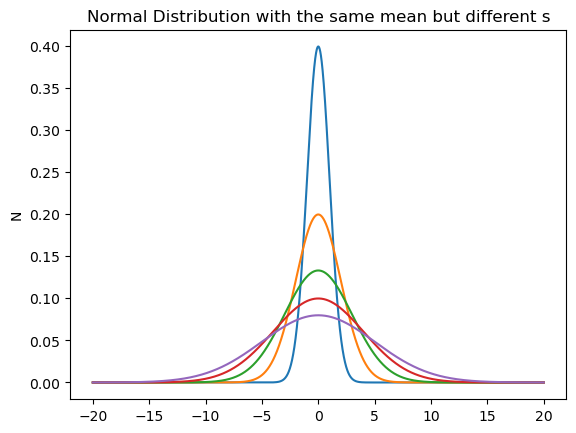

In [15]:
## generate the data and plot it for an ideal normal curve

## x-axis for the plot [random numbers in -N to N range]
x_data = np.arange(-20, 20, 0.0001)

## y-axis as the gaussian  (https://scipy.github.io/devdocs/reference/generated/scipy.stats.norm.html)
y_data = stats.norm.pdf(x_data, 0, 1)

y1_data = stats.norm.pdf(x_data, 0, 2)
y2_data = stats.norm.pdf(x_data, 0, 3)
y3_data = stats.norm.pdf(x_data, 0, 4)
y4_data = stats.norm.pdf(x_data, 0, 5)

## plot data
plt.plot(x_data, y_data, label='')
plt.plot(x_data, y1_data, label='')
plt.plot(x_data, y2_data, label='')
plt.plot(x_data, y3_data, label='')
plt.plot(x_data, y4_data, label='')

#plt.xlabel("Gaussain variable")
plt.ylabel("N")
#plt.legend(["blue", "green"], loc="lower right")
plt.title("Normal Distribution with the same mean but different s")
plt.legend(loc='upper left', frameon=False)
plt.show()


<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_6924\1428932213.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x_data, y_data, label='$\mu_{1}$ = $\sigma_{1}$=3')
C:\Users\User\AppData\Local\Temp\ipykernel_6924\1428932213.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x_data, y1_data, label='$\mu_{2}$ = $\sigma_{2}$=3')
C:\Users\User\AppData\Local\Temp\ipykernel_6924\1428932213.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x_data, y2_data, label='$

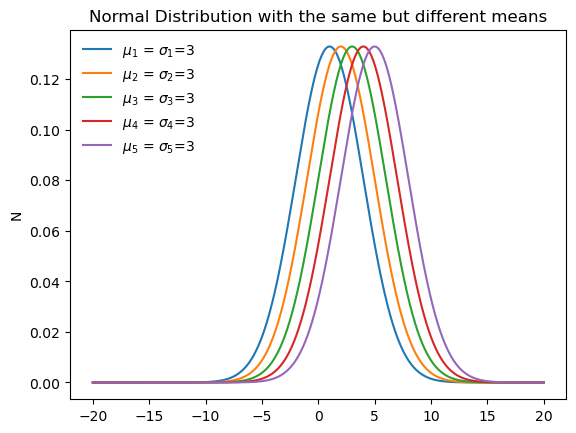

In [16]:
## y-axis as the gaussian
y_data = stats.norm.pdf(x_data, 1, 3)
y1_data = stats.norm.pdf(x_data, 2, 3)
y2_data = stats.norm.pdf(x_data, 3, 3)
y3_data = stats.norm.pdf(x_data, 4, 3)
y4_data = stats.norm.pdf(x_data, 5, 3)

## plot data
plt.plot(x_data, y_data, label='$\mu_{1}$ = $\sigma_{1}$=3')
plt.plot(x_data, y1_data, label='$\mu_{2}$ = $\sigma_{2}$=3')
plt.plot(x_data, y2_data, label='$\mu_{3}$ = $\sigma_{3}$=3')
plt.plot(x_data, y3_data, label='$\mu_{4}$ = $\sigma_{4}$=3')
plt.plot(x_data, y4_data, label='$\mu_{5}$ = $\sigma_{5}$=3')

#plt.xlabel("Gaussain variable")
plt.ylabel("N")
#plt.legend(["blue", "green"], loc="lower right")
plt.title("Normal Distribution with the same but different means")
plt.legend(loc='upper left', frameon=False)
plt.show()

In [17]:
y_data = stats.norm.pdf(x_data, 0, 0.1)
y1_data = stats.norm.pdf(x_data, 1, 2)

y2_data = stats.norm.pdf(x_data, 2, 0.4)

400000


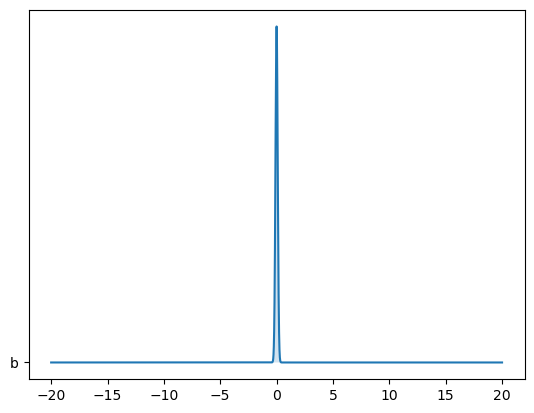

In [18]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data)
print(len([0 for i in range(len(y_data))]))
ax.fill_between(x_data,  y_data, "b", alpha = 0.2) 

In [26]:
from scipy.optimize import curve_fit
from  iminuit import Minuit
from iminuit.cost import LeastSquares

In [27]:
def fit_function(x,mu1, mu2, mu3,sigma1,sigma2,sigma3 ):
    result = 0
    mus = [mu1, mu2,mu3]
    sigmas = [sigma1, sigma2,sigma3]
    for i, mu in enumerate(mus):
        result += np.exp(((x-mu)/sigmas[i])**2)
    return result

C:\Users\User\AppData\Local\Temp\ipykernel_6924\1728964343.py:6: RuntimeWarning: overflow encountered in exp
  result += np.exp(((x-mu)/sigmas[i])**2)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1400.

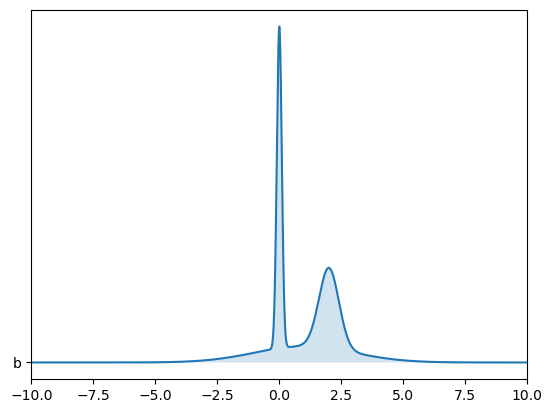

In [30]:
y_tot = y_data+y1_data+y2_data
fig, ax = plt.subplots()
ax.plot(x_data, y_tot)
ax.fill_between(x_data,  y_tot, "b", alpha = 0.2) 
plt.xlim(-10,10)
popt, pcov = curve_fit(fit_function, x_data, y_tot, p0 =(0,1,2,1,2,3) )


In [32]:
m = Minuit(least_squares, mu1=0, mu2=1, mu3=2, sigma1=1, sigma2=2, sigma3=3)
least_squares = LeastSquares(x_data, y_tot, np.sqrt(y_tot), fit_function)

#  Eseguiamo il fit
m.migrad()

# Estraiamo i valori ottimali dei parametri
popt = m.values
pcov = m.covariance  # Matrice di covarianza dei parametri

# Plot dei risultati


In [35]:
# Valori ottimali dei parametri
print("Valori ottimali del fit:")
print(m.values)

# Se vuoi i singoli parametri
mu1_fit = m.values["mu1"]
mu2_fit = m.values["mu2"]
mu3_fit = m.values["mu3"]
sigma1_fit = m.values["sigma1"]
sigma2_fit = m.values["sigma2"]
sigma3_fit = m.values["sigma3"]

print(f"mu1: {mu1_fit}, mu2: {mu2_fit}, mu3: {mu3_fit}")
print(f"sigma1: {sigma1_fit}, sigma2: {sigma2_fit}, sigma3: {sigma3_fit}")


Valori ottimali del fit:
<ValueView mu1=0.0 mu2=1.0 mu3=2.0 sigma1=1.0 sigma2=2.0 sigma3=3.0>
mu1: 0.0, mu2: 1.0, mu3: 2.0
sigma1: 1.0, sigma2: 2.0, sigma3: 3.0


In [ ]:
fig, ax = plt.subplots()
ax.plot(x_data, y_tot, label='Dati originali')
ax.plot(x_data, fit_function(x_data, *popt.values()), label='Fit con Minuit', color='r')
ax.fill_between(x_data, y_tot, "b", alpha=0.2) 
plt.xlim(-10, 10)
ax.legend()
plt.show()

In [105]:
popt

array([ 2.37541406e+01, -4.28506625e+09, -4.28468724e+11,  3.39960917e-01,
       -1.01974163e+09, -3.30451901e+11])

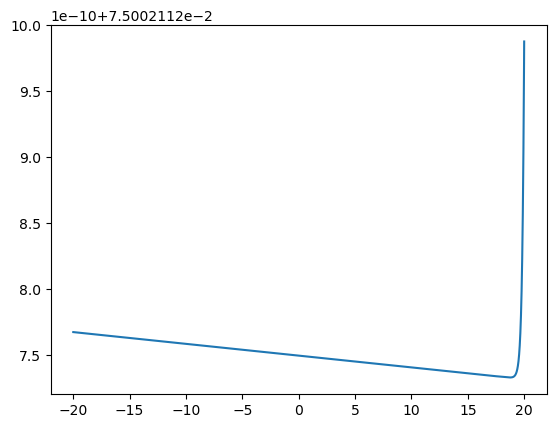

In [106]:
plt.plot(x_data, fit_function(x_data, *popt))
ax.plot(x_data, y_tot)
ax.fill_between(x_data,  y_tot, "b", alpha = 0.2) 